In [1]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt
from PIL import Image
import random


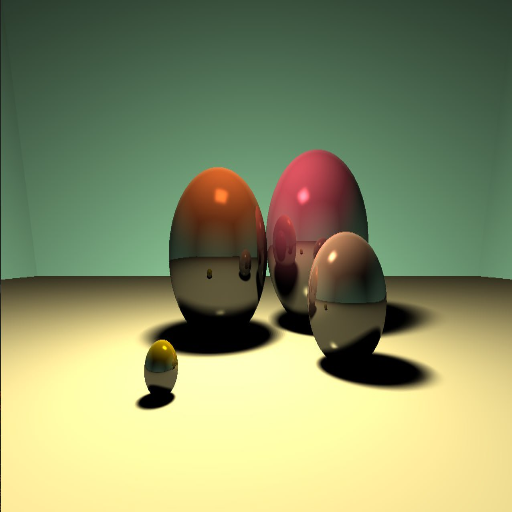

In [95]:
# img1_path = 'balls_rough.jpg'
# img1_path = 'balls.jpg'

# img1_path = 'lena.tiff'
img1_path = 'balls.jpg'
# img1_path = 'cute.jpg'


image = cv.imread(img1_path)
# image = cv.resize(image, (1024,1024))
image = cv.resize(image, (512,512))


# image =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# print(image[:,:, 2].shape)
# image.to
display(Image.fromarray(image[:, :, ::-1]))

In [3]:

# image_normalized = image/255

# display(Image.fromarray(image_normalized*255))


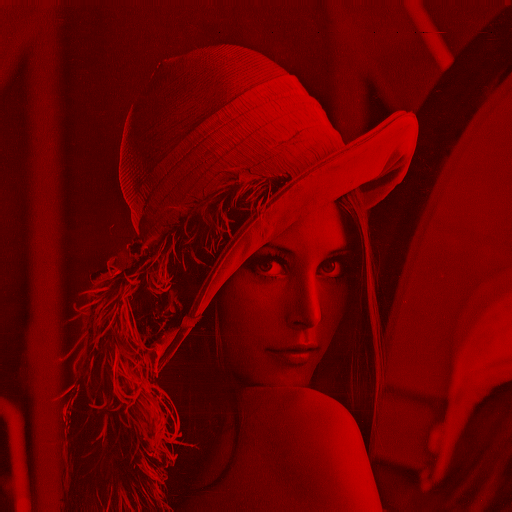

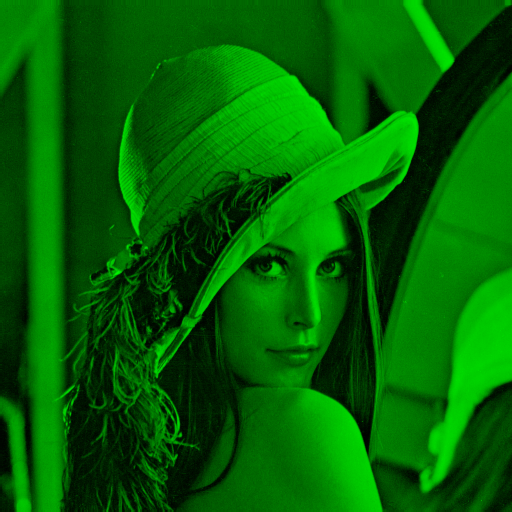

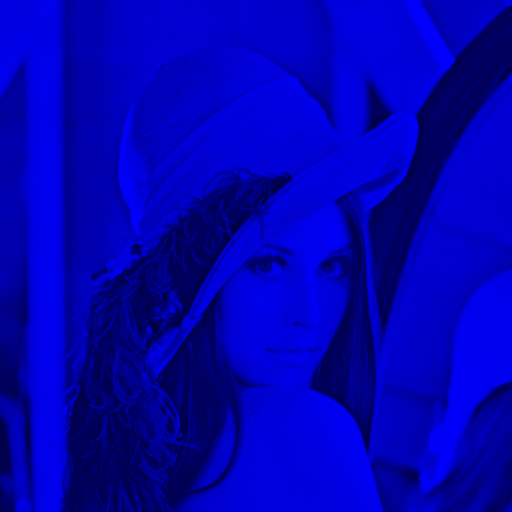

In [4]:
Z1 = np.zeros_like(image)
Z1[:,:,0] = image[:,:,0]
Z2 = np.zeros_like(image)
Z2[:,:,1] = image[:,:,1]
Z3 = np.zeros_like(image)
Z3[:,:,2] = image[:,:,2]
display(Image.fromarray(Z1))
display(Image.fromarray(Z2))
display(Image.fromarray(Z3))
# print(image.shape)

In [5]:
def map_to_0_1(arr):
    return (arr-arr.min())/(arr.max()-arr.min())
def map_to_0_1_from_a_b(arr, a, b):
    return (arr-a)/(b-a)
def map_to_0_1_from_0_255(arr):
    return (arr)/(255)
def map_to_0_255(arr):
    return (np.rint(map_to_0_1(arr)*255)).astype(np.uint8)
def map_to_0_x(arr, x):
    return (np.rint(map_to_0_1(arr)*x)).astype(np.uint8)
def filterimage(X: np.array,S1,S2):

    Z= map_to_0_1(X);
    [m,n]=X.shape[:2];
    S1skip=(len(S1)-1)//2; S2skip=(len(S2)-1)//2;
    for col in range(1, n):
        res=np.convolve(Z[:,col],S1);
        Z[:,col]=res[(S1skip):(len(res)-S1skip)];
    for row in range(1, m):
        res=np.convolve(Z[row,:],S2);
        Z[row,:]=res[(S2skip):(len(res)-S2skip)];
    return map_to_0_255(Z)

def filter_BGR_image(X: np.array,S1,S2):
    res1 = filterimage(X[:,:,0], S1, S2)
    res2 = filterimage(X[:,:,1], S1, S2)
    res3 = filterimage(X[:,:,2], S1, S2)

    filtered_img = np.zeros_like(image)
    filtered_img[:,:,0] = res1
    filtered_img[:,:,1] = res2
    filtered_img[:,:,2] = res3
    return filtered_img

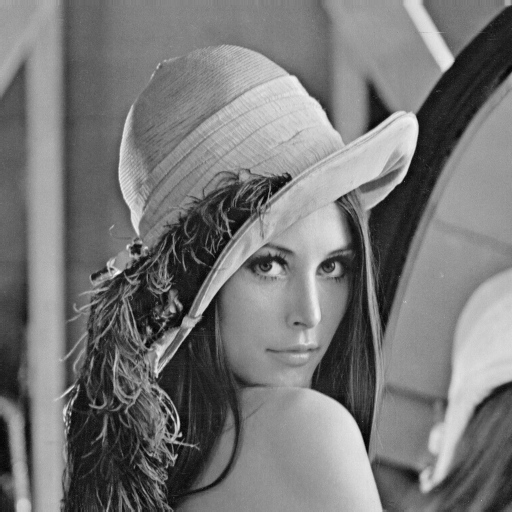

In [6]:
# newvals=np.sqrt(image[:,:,0]**2+image[:,:,1]**2+image[:,:,2]**2);
a = (np.array(image[:,:,0])/255)**2
b = (np.array(image[:,:,1])/255)**2
c = (np.array(image[:,:,2])/255)**2
newvals= np.sqrt(a + b + c)
Z2=np.rint(map_to_0_1(newvals)*255).astype(np.uint8);
greyscale = np.zeros_like(image)
greyscale[:,:,0] = newvals
greyscale = greyscale[:,:,0]
display(Image.fromarray(Z2))

In [7]:
# res = filterimage(image, [1], [1/8, 1/8, 1/4, 1/4, 1/2])
# [1/8, 1/4, 1/2, 1/4, 1/8]

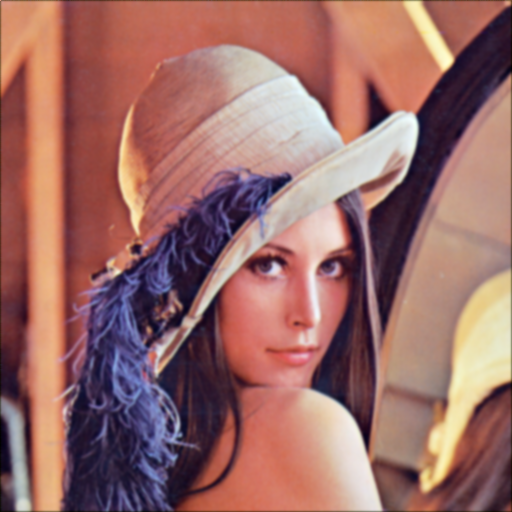

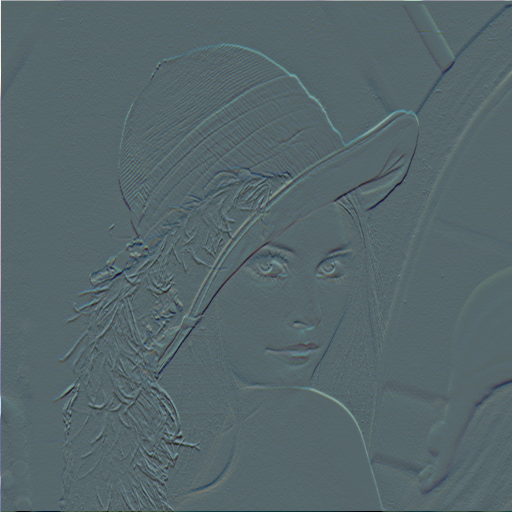

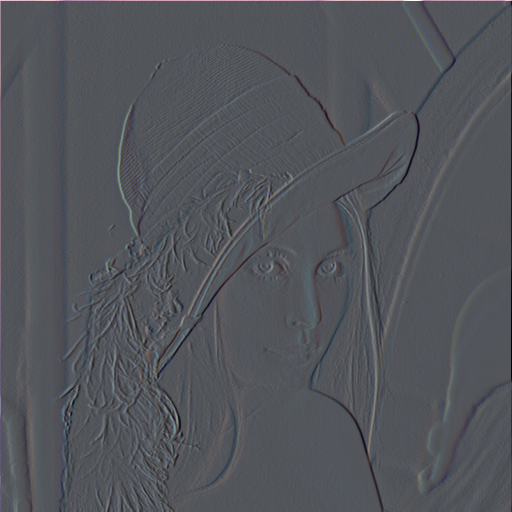

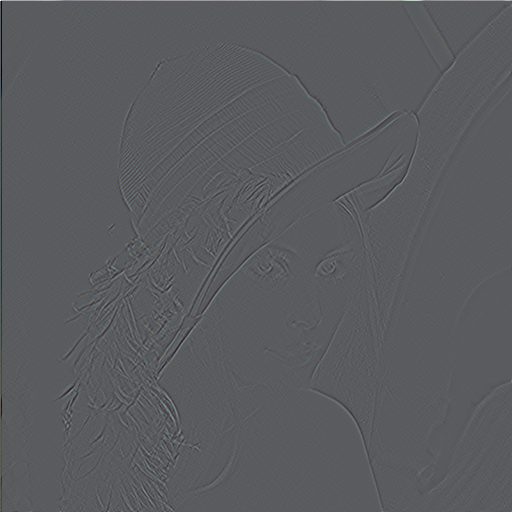

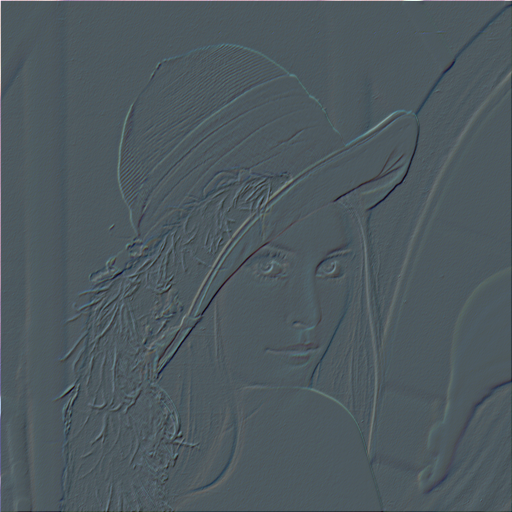

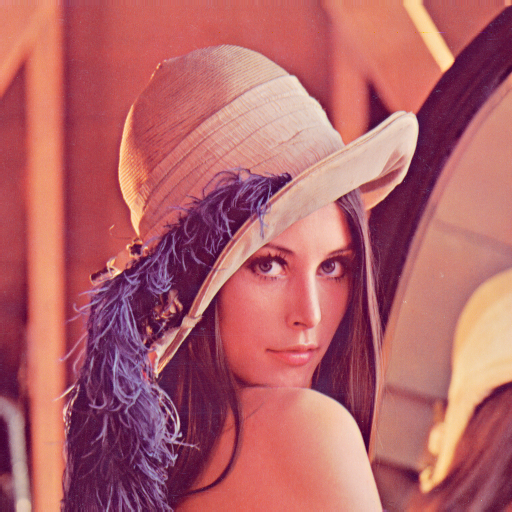

In [8]:
filter_arr = np.array((1,6,15,20,15,6,1))/64
# filter_arr = np.array((1,2,1))/4
bass_reducing_filter =  np.array((1,0,-1))/2
smoothing_filter = np.array((1,6,15,20,15,6,1))/64




bass_filtered_img_by_x = filter_BGR_image(image, bass_reducing_filter, [1])
bass_filtered_img_by_y = filter_BGR_image(image, [1], bass_reducing_filter)
bass_filtered_img_by_xy = filter_BGR_image(image, bass_reducing_filter, bass_reducing_filter)
smoothing_filtered_img = filter_BGR_image(image, smoothing_filter, smoothing_filter)
image_gradient = (np.rint(map_to_0_1(np.sqrt(map_to_0_1(bass_filtered_img_by_x)**2 + map_to_0_1(bass_filtered_img_by_y)**2))*255)).astype(np.uint8)
# print(image - image_gradient)
# image_gradient[0,0,0]+=1000
# np.round()
# print(np.round(image_gradient))
# print(image_gradient[0,0,0])

display(Image.fromarray(smoothing_filtered_img[:,:,::-1]))
display(Image.fromarray(bass_filtered_img_by_x[:,:,::-1]))
display(Image.fromarray(bass_filtered_img_by_y[:,:,::-1]))
display(Image.fromarray(bass_filtered_img_by_xy[:,:,::-1]))

display(Image.fromarray((image_gradient)[:,:,::-1]))


# # print(bass_filtered_img)

display(Image.fromarray(image[:,:,::-1]))

In [9]:
# silly_little_filter = [1 for i in range(50)] +[0]
silly_little_filter = [1.1, 1.3, 1.5, 2.2, 2.4, 2.6, 3.1, 3.3, 3.5, 3.7, 3.9]
# silly_little_filter = [1 for i in range(50)] +[0]

# 2, 3, 4, 5, 7, 8, 9
silly_little_filter = [2, 3, 4, 5, 7, 8, 9]
silly_little_filter = [1/4,-1/4, 0]


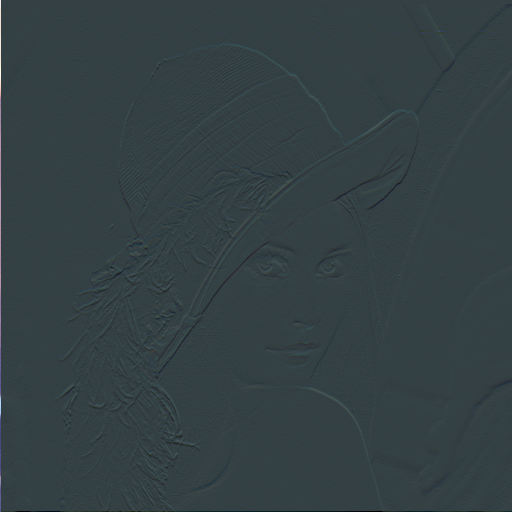

In [10]:
f = filter_BGR_image(image, silly_little_filter, [1])
display(Image.fromarray(f[:,:,::-1]))


0 255
-2.842170943040401e-14 512.0
original


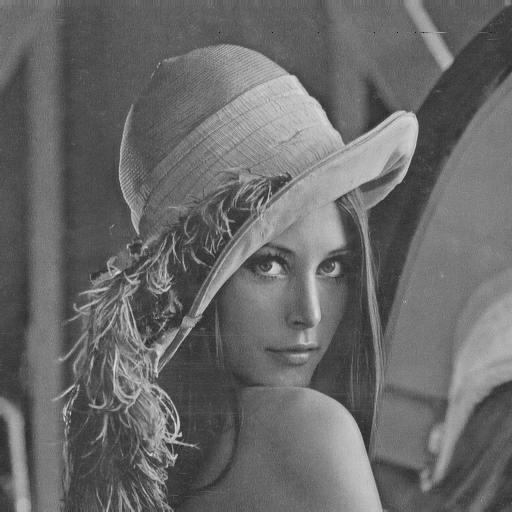

inverse transform


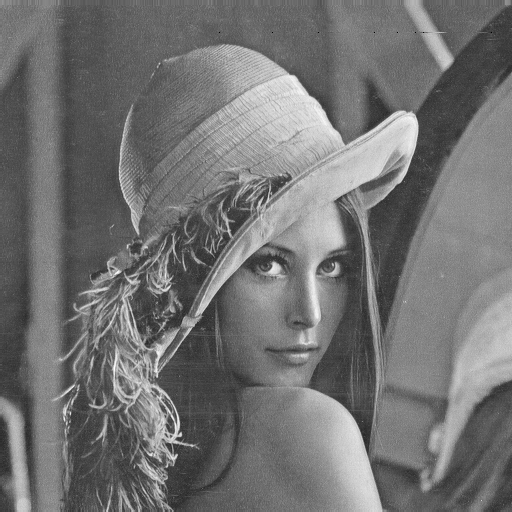

NameError: name 'calculate_MSE' is not defined

In [11]:

def hard_threshold2D(arr,threshold_val):
    arr_new = arr.copy()
    for a, i in enumerate(arr_new):
        for b, j in enumerate(i):
                if j<threshold_val: arr_new[a,b] = 0
    return arr_new;
def soft_threshold2D(arr,threshold_val):
    arr_new = arr.copy()
    for a, i in enumerate(arr_new):
        for b, j in enumerate(i):
                if j<np.sign(j) * (threshold_val): arr_new[a,b] = 0
                else: arr_new[a,b] = np.sign(j)*( arr_new[a,b] - threshold_val)
    return arr_new;
def create_haar_mtx(n):
    if n == 1:
        return np.array([[1,1],
                         [1,-1]])
    return np.array([*np.kron(create_haar_mtx(n-1), np.array([1,1])),
                    *np.kron((2**((n-1)/2))*np.identity(2**(n-1)), np.array([1, -1]))])

def dwt_Haar(image):
    # res = (image[:,:,2])/1.0
    H = create_haar_mtx(int(np.log2(image.shape[0])))
    res  = H @ map_to_0_1(image[:,:,0]) @ H.T
    return res
def idwt_Haar(image):
    H = create_haar_mtx(int(np.log2(image.shape[0])))
    inv = map_to_0_255(H.T @ image @ H)
    print(inv.min(), inv.max())
    I = H.T @ H
    print(I.min(), I.max())

    return inv
def map_to_0_1_from_a_b(arr, a, b):
    return (arr-a)/(b-a)
def map_to_0_1_from_0_255(arr):
    return (arr)/(255)
def map_to_0_255(arr):
    return (np.rint(map_to_0_1(arr)*255)).astype(np.uint8)

# threshold_val  = np.median(o) * np.sqrt(2 * np.log(image.shape[0] * image.shape[1])) / 0.675
# a,b = image2.min(), image2.max()
# o[image.shape[0]//2:, image.shape[1]//2:] = hard_threshold2D(o[image.shape[0]//2: , image.shape[1]//2:], threshold_val)
# o[:image.shape[0]//2, image.shape[1]//2:] = hard_threshold2D(o[:image.shape[0]//2 , image.shape[1]//2:], threshold_val)
# o[image.shape[0]//2:, :image.shape[1]//2] = hard_threshold2D(o[image.shape[0]//2: , :image.shape[1]//2], threshold_val)

# inv =  map_to_0_1_from_a_b(H.T @ o @ H, a, b)
# inv = (np.rint(inv*255)).astype(np.uint8)
haar = dwt_Haar(image)
inv = idwt_Haar(haar)
# print("LL (upper left corner)") 

# display(Image.fromarray( cv.resize(haared_img, (512,512), interpolation=cv.INTER_NEAREST)))
# import pywt

# coeffs = pywt.dwt2(image, "haar")
# LL, (LH, HL, HH) = coeffs
# # print(LL)
# print("how it should look") 
# display(Image.fromarray( cv.resize(map_to_0_255(LL), (512,512), interpolation=cv.INTER_NEAREST)))
print("original") 

display(Image.fromarray( cv.resize(image[:,:,0], (512,512), interpolation=cv.INTER_NEAREST)))
print("inverse transform") 

display(Image.fromarray( cv.resize(inv, (512,512), interpolation=cv.INTER_NEAREST)))



# display(Image.fromarray(map_to_0_255(haar_mtx)))
calculate_MSE(image[:,:,0], inv)



In [ ]:
# image2 = DWTHaarImpl(image, 2)
# # f = filter_BGR_image(image, [-1], [1])
# display(Image.fromarray(image2[:,:,::-1]))


<built-in method min of numpy.ndarray object at 0x000001FA71870F30>


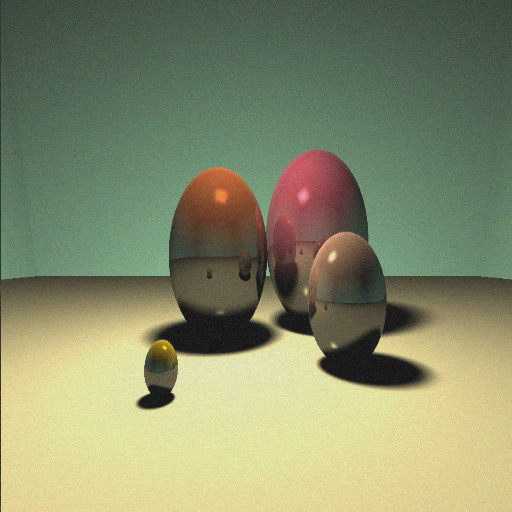

In [158]:
# Load image
row,col,ch= image.shape
mean = 0.000
var = 0.001
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
e = np.random.normal(mean,sigma,(row))
corr_noise = np.outer(e,e)*255
noise_3ch = np.zeros_like(image)
noise_3ch[:,:,0] = corr_noise
noise_3ch[:,:,1] = corr_noise
noise_3ch[:,:,2] = corr_noise

gauss = gauss.reshape(row,col,ch)*255
original = map_to_0_255(image + gauss)
print(original.min)
# a = np.random.multivariate_normal(([mean]*512), corr_noise, (row,col))
# original = map_to_0_255(image + a)
display(Image.fromarray(original[:,:,::-1]))

4.4999999999999964 4.4999999999999964
0.03162277660168379 0.02616317097632231
4.4999999999999964 4.4999999999999964
0.03162277660168379 0.02616317097632231
4.4999999999999964 4.4999999999999964
0.03162277660168379 0.02616317097632231


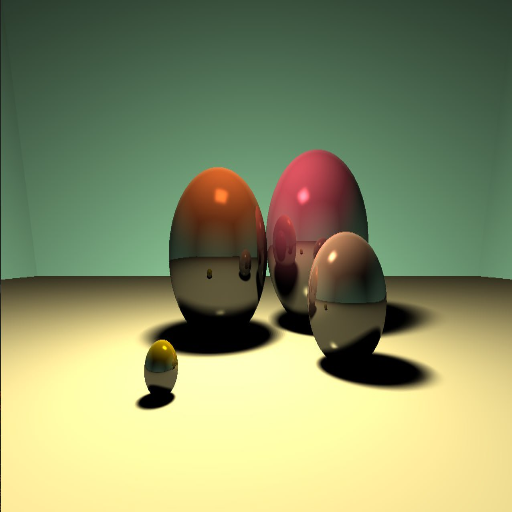

noisy image


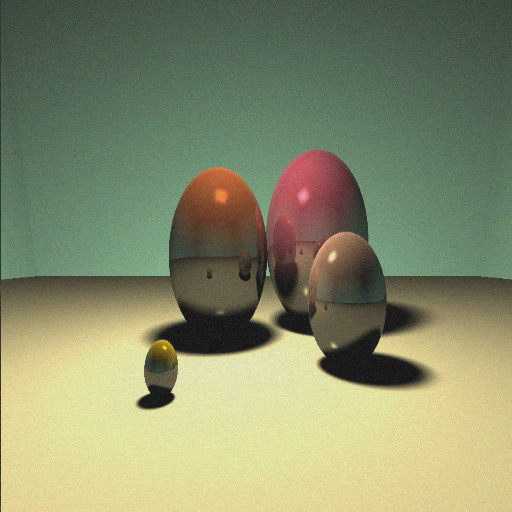

denoised image


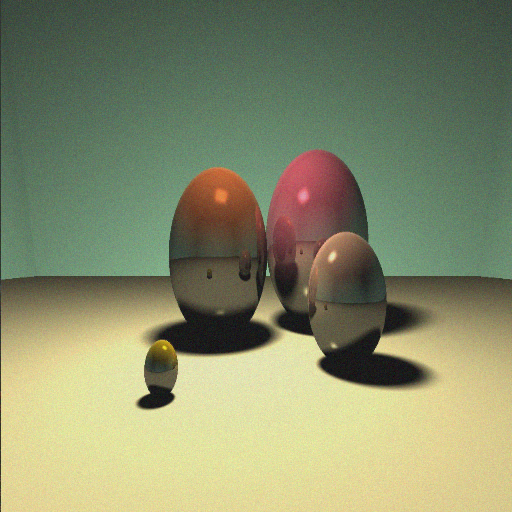

MSE noised image
(29.21104780910655, 28.999193556373548, 28.562002529290716)
(77.9786262512207, 81.87682723999023, 90.54825973510742)
MSE denoised
(29.231323630423148, 29.070489839783313, 28.624866893173934)
(77.61541748046875, 80.54366302490234, 89.24700927734375)
MSE blurred_image
(27.472651990328565, 34.34122218438975, 33.43659508149236)
(116.36306762695312, 23.930850982666016, 29.472763061523438)
0


In [160]:
import numpy as np
import pywt
import pywt.data
from scipy import stats
def find_threshold_val(arr):
    MAD = np.median(np.abs(arr-np.median(arr)))
    a = stats.median_abs_deviation(arr, axis=None)
    print(MAD, a)
    s = MAD/0.6745/255
    print(sigma, s)
    # print(np.median(arr))
    return s*np.sqrt(2 * np.log2(arr.shape[0] * arr.shape[1]))

def recursive_DWT(image, wavelet, threshold, threshold_val, depth):
    if depth == 0:
        return image
    
    coeffs = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs
    # LH = threshold(LH, find_threshold_val(LH))
    # HL = threshold(HL, find_threshold_val(HL))
    HH = threshold(HH, find_threshold_val(HH))

    LL = recursive_DWT(LL, wavelet, threshold, threshold_val, depth-1)
#--------- recursion here
    coeffs = LL, (LH, HL, HH)
    inv = pywt.idwt2(coeffs, wavelet)

    return inv

def getChannel(original, ch, threshold):
    # wavelet = "bior6.8"
    # wavelet = "bior4.4"

    wavelet = "haar"

    # wavelet = "db4"
    # wavelet = "morl"
    threshold_val = 0
    image = original[:,:, ch]
    return ((recursive_DWT((image), wavelet, threshold, threshold_val,1)))

def fillColor(original, r, g, b):
    res = np.zeros_like(original)
    res[:,:,0] = r
    res[:,:,1] = g
    res[:,:,2] = b
    return res
def displayDWT(image):
    wavelet = "haar"
    coeffs2 = pywt.dwt2(original[:,:, 0], wavelet)
    LLR, (LHR, HLR, HHR) = coeffs2
    # coeffs2 = pywt.dwt2(original[:,:, 1], wavelet)
    # LLG, (LHG, HLG, HHG) = coeffs2
    # coeffs2 = pywt.dwt2(original[:,:, 2], wavelet)
    # LLB, (LHB, HLB, HHB) = coeffs2
    display(Image.fromarray(map_to_0_x(LLR, 255)))
    display(Image.fromarray(map_to_0_x(LHR, 255)))
    display(Image.fromarray(map_to_0_x(HLR, 255)))
    display(Image.fromarray(map_to_0_x(HHR, 255)))

def threshold(arr,threshold_val):
    arr_new = arr.copy()
    for a, i in enumerate(arr_new):
        for b, j in enumerate(i):
            for c, k in enumerate(j):
                if k<threshold_val: arr_new[a,b,c] = 0
    # print(arr > threshold_val)
    return arr_new;
def hard_threshold2D(arr,threshold_val):
    arr_new = arr.copy()
    for a, i in enumerate(arr_new):
        for b, j in enumerate(i):
                if j<np.sign(j) * threshold_val: arr_new[a,b] = 0
    return arr_new;
def soft_threshold2D(arr,threshold_val):
    arr_new = arr.copy()
    for a, i in enumerate(arr_new):
        for b, j in enumerate(i):
                if j < np.sign(j) * (threshold_val): arr_new[a,b] = 0
                else: arr_new[a,b] = np.sign(j)*( abs(j) - threshold_val)
    return arr_new;


# displayDWT(image)
# smoothing_filter = np.array((1,8,28,56,70,56,28,8,1
# ))/sum((1,8,28,56,70,56,28,8,1))
#image[0,0]=np.array([0,0,0])
inv1 = getChannel(original , 0, soft_threshold2D)
inv2 = getChannel(original , 1, soft_threshold2D)
inv3 = getChannel(original , 2, soft_threshold2D)
denoised_img = (fillColor(original, inv1, inv2, inv3))
# denoised_img = filter_BGR_image(denoised_img, smoothing_filter, smoothing_filter)



# display(Image.fromarray(res[:,:,::-1]))
# img_np = np.where( original > 200, 255, 0).astype(np.uint8)
# display(Image.fromarray(img_np[:,:,::-1]))

# display(Image.fromarray(image[:,:,::-1]))

def calculate_MSE(arr1,arr2):
    return ((arr1 - arr2)**2).mean();


def PSNR(image1, image2, R=255):
    return 10*np.log10((R**2)/calculate_MSE(image1, image2))

blurred_image = filter_BGR_image(original, smoothing_filter, smoothing_filter)

display(Image.fromarray(image[:,:,::-1]))
print("noisy image")
display(Image.fromarray(original[:,:,::-1]))
print("denoised image")
display(Image.fromarray(denoised_img[:,:,::-1]))
# display(Image.fromarray(original[:,:,0]))
# display(Image.fromarray(denoised_img[:,:,0]))

# display(Image.fromarray(blurred_image[:,:,::-1]))
print("MSE noised image")
print(((PSNR(image[:,:,0], original[:,:,0]), PSNR(image[:,:,1], original[:,:,1]), PSNR(image[:,:,2], original[:,:,2]))))
print(((calculate_MSE(image[:,:,0], original[:,:,0]), calculate_MSE(image[:,:,1], original[:,:,1]), calculate_MSE(image[:,:,2], original[:,:,2]))))

print("MSE denoised")
print(((PSNR(image[:,:,0], denoised_img[:,:,0]), PSNR(image[:,:,1], denoised_img[:,:,1]), PSNR(image[:,:,2], denoised_img[:,:,2]))))
print(((calculate_MSE(image[:,:,0], denoised_img[:,:,0]), calculate_MSE(image[:,:,1], denoised_img[:,:,1]), calculate_MSE(image[:,:,2], denoised_img[:,:,2]))))

print("MSE blurred_image")
print(((PSNR(image[:,:,0], blurred_image[:,:,0]), PSNR(image[:,:,1], blurred_image[:,:,1]), PSNR(image[:,:,2], blurred_image[:,:,2]))))
print(((calculate_MSE(image[:,:,0], blurred_image[:,:,0]), calculate_MSE(image[:,:,1], blurred_image[:,:,1]), calculate_MSE(image[:,:,2], blurred_image[:,:,2]))))
print(image[:,:,1].min())





In [ ]:
pywt.wavelist()
print(pywt.wavelist(kind='discrete'))